In [3]:
import pandas as pd

# ✅ Correct file path
df = pd.read_csv(r"D:\retail_sales_forecasting\Walmart_Store_sales.csv")

# Check if loaded
print("Shape:", df.shape)
df.head()


Shape: (6, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106
3,2,2010-02-05,21827.90,0,36.47,2.572,211.096358,8.324
4,2,2010-02-12,21043.39,1,36.42,2.548,211.242170,8.324


In [4]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Add new time features
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

# Check for nulls
print("\nMissing Values:\n", df.isnull().sum())

# View updated data
df.head()



Missing Values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month           0
Year            0
Week            0
dtype: int64


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Week
0,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,2,2010,5
1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,2,2010,6
2,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,2,2010,7
3,2,2010-02-05,21827.90,0,36.47,2.572,211.096358,8.324,2,2010,5
4,2,2010-02-12,21043.39,1,36.42,2.548,211.242170,8.324,2,2010,6


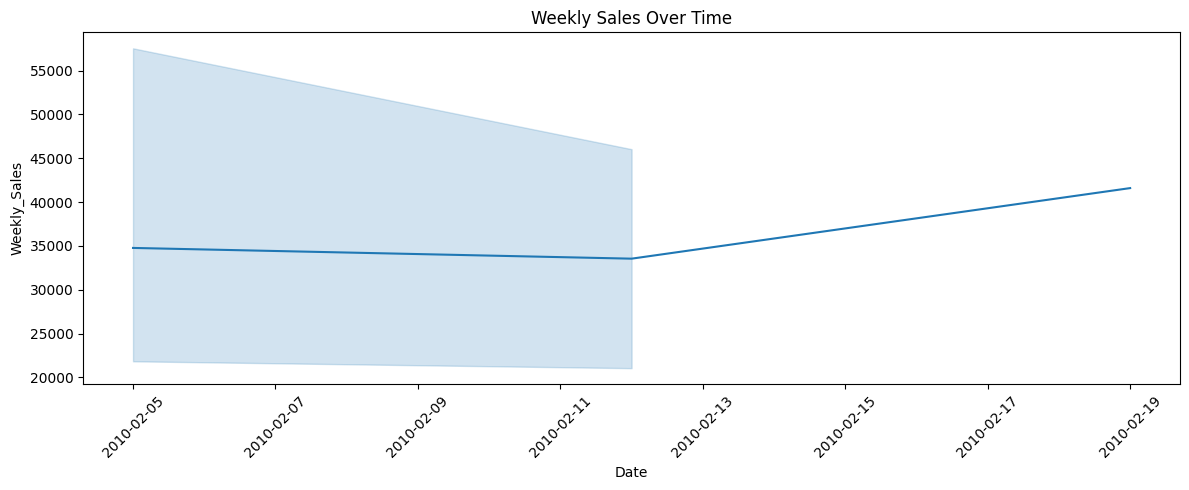

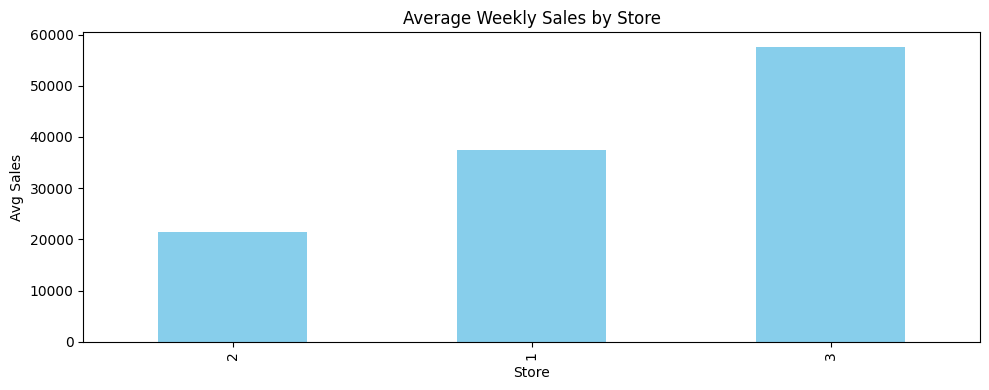

In [5]:
# Sales over time
plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title('Weekly Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Average sales by store
plt.figure(figsize=(10,4))
df.groupby('Store')['Weekly_Sales'].mean().sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Weekly Sales by Store')
plt.ylabel('Avg Sales')
plt.tight_layout()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# Prepare features and target
X = df_model.drop('Weekly_Sales', axis=1)
y = df_model['Weekly_Sales']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # manually computing RMSE
r2 = r2_score(y_test, y_pred)

print("✅ RMSE:", round(rmse, 2))
print("✅ R² Score:", round(r2, 4))


✅ RMSE: 17766.24
✅ R² Score: -1.8318


In [10]:
import os

# Create the app folder if it doesn't exist
os.makedirs(r"D:\retail_sales_forecasting\app", exist_ok=True)


In [11]:
import joblib

model_path = r"D:\retail_sales_forecasting\app\sales_model.joblib"
joblib.dump(model, model_path)

print(f"✅ Model saved successfully at: {model_path}")


✅ Model saved successfully at: D:\retail_sales_forecasting\app\sales_model.joblib
